Predicted class for new signal: Sine


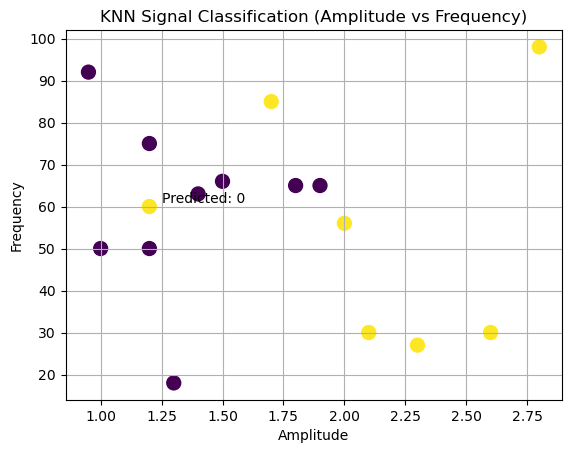

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

amplitude = [1, 1.2, 1.8, 2.6, 1.2, 1.7, 1.9, 2.1, 1.2, 2.8, 0.95, 2.3, 1.3, 2, 1.5]
frequency = [50, 60, 65, 30, 75, 85, 65, 30, 50, 98, 92, 27, 18, 56, 66]
duration = [1, 0.9, 1.4, 1, 1.6, 1.5, 1, 0.3, 1.9, 1.8, 0.1, 1.7, 1, 1.9, 1.6]
peak_to_peak = [3, 2, 2.6, 4.1, 3.4, 2.6, 2.8, 1.2, 3.2, 1.6, 4.5, 3.7, 2.9, 1.8, 4.6]
labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Sine → 0, Square → 1


data = list(zip(amplitude, frequency, duration, peak_to_peak))
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(data, labels)


new_signal = [(1.4, 63, 0.7, 2.8)]  


prediction = knn.predict(new_signal)
print(f"Predicted class for new signal: {'Sine' if prediction[0] == 0 else 'Square'}")


plt.scatter(
    [a for a in amplitude] + [new_signal[0][0]],
    [f for f in frequency] + [new_signal[0][1]],
    c=labels + [prediction[0]],
    s=100
)
plt.text(new_signal[0][0]-0.15, new_signal[0][1]-2, f"Predicted: {prediction[0]}", fontsize=10)
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("KNN Signal Classification (Amplitude vs Frequency)")
plt.grid()
plt.show()

Predicted status: Defective


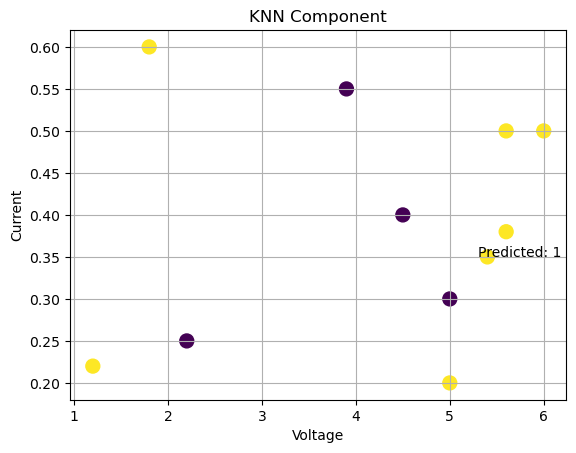

In [16]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# Dataset
voltage = [6, 4.5, 1.8, 5, 5, 2.2, 3.9, 5.4, 5.6, 1.2]
current = [0.5, 0.4, 0.6, 0.3, 0.2, 0.25, 0.55, 0.35, 0.5, 0.22]
labels =  [1,   0,   1,   0,  1,   0,    0,    1,   1,   1]  # Working=0, Defective=1
data = list(zip(voltage, current))
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, labels)
# New component to classify (example)
new_component = [(5.6, 0.38)]  
prediction = knn.predict(new_component)
print(f"Predicted status: {'Working' if prediction[0] == 0 else 'Defective'}")
# Plot
plt.scatter(
    voltage + [new_component[0][0]],
    current + [new_component[0][1]],
    c=labels + [prediction[0]],
    s=100
)
plt.text(new_component[0][0]-0.3, new_component[0][1]-0.03, f"Predicted: {prediction[0]}", fontsize=10)
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.title("KNN Component")
plt.grid(True)
plt.show()



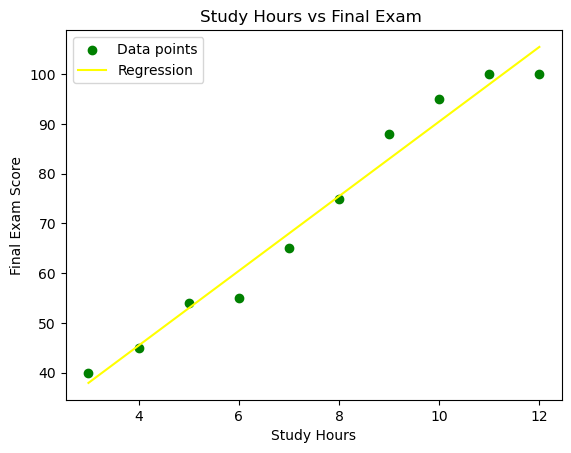

Predicted Final Exam Score for 6.5 study hours: 64.19


In [26]:
import matplotlib.pyplot as plt
from scipy import stats
study_hours = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
final_scores = [40, 45, 54, 55, 65, 75, 88, 95, 100, 100]
slope, intercept, r, p, std_err = stats.linregress(study_hours, final_scores)
# Function to apply the regression model
def myfunc(x):
    return slope * x + intercept
predicted_scores = list(map(myfunc, study_hours))
plt.scatter(study_hours, final_scores, color='green', label='Data points')
plt.plot(study_hours, predicted_scores, color='yellow', label='Regression')
plt.xlabel('Study Hours')
plt.ylabel('Final Exam Score')
plt.title('Study Hours vs Final Exam ')
plt.legend()
plt.show()
new_study_hour = 6.5
predicted_score = myfunc(new_study_hour)
print(f"Predicted Final Exam Score for {new_study_hour} study hours: {predicted_score:.2f}")

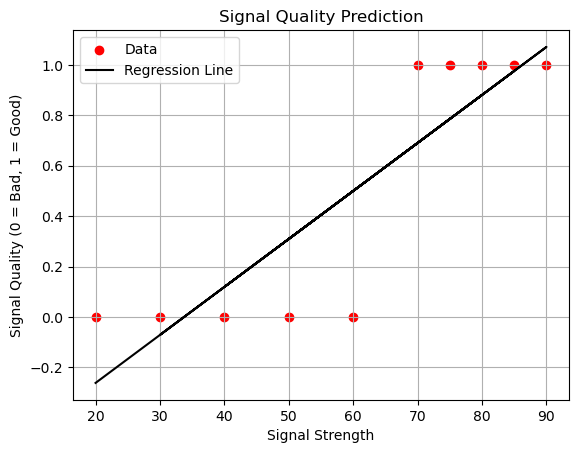

Predicted Signal Quality for Strength 67: Good


In [30]:
import matplotlib.pyplot as plt
from scipy import stats

transmitters = ['T1', 'T2', 'T1', 'T3', 'T2', 'T1', 'T3', 'T2', 'T1', 'T3']
signal_strength = [75, 50, 90, 40, 85, 70, 30, 60, 80, 20]
frequency = [2000, 1500, 2200, 1300, 2100, 1800, 1200, 1600, 1900, 1100]
signal_quality = ['Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad']


quality_encoded = [1 if q == 'Good' else 0 for q in signal_quality]
slope, intercept, r, p, std_err = stats.linregress(signal_strength, quality_encoded)
def predict(x):
    return slope * x + intercept
model = list(map(predict, signal_strength))
plt.scatter(signal_strength, quality_encoded, color='red', label='Data')
plt.plot(signal_strength, model, color='black', label='Regression Line')
plt.title("Signal Quality Prediction")
plt.xlabel("Signal Strength")
plt.ylabel("Signal Quality (0 = Bad, 1 = Good)")
plt.legend()
plt.grid(True)
plt.show()

new_signal_strength = 67
predicted_value = predict(new_signal_strength)
predicted_label = round(predicted_value)
print(f"Predicted Signal Quality for Strength {new_signal_strength}: {'Good' if predicted_label == 1 else 'Bad'}")

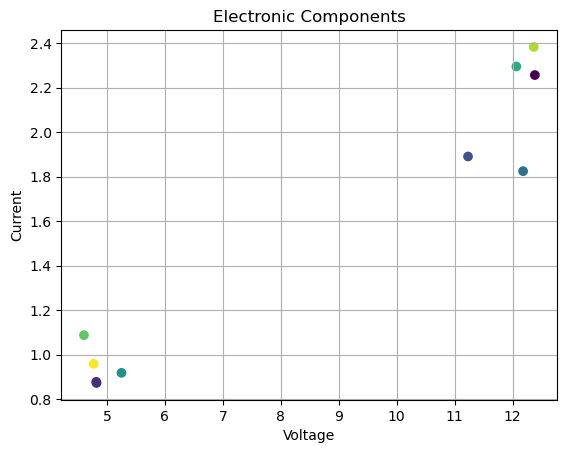

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

voltage = [4.819941, 5.249786, 4.771151, 4.602712, 4.814919,12.38281, 12.36406, 11.22958, 12.17975, 12.06387]
current = [1.872930, 0.918358, 1.958775, 1.087788, 0.877739,2.257141, 2.383657, 1.891070, 1.825070, 2.295750]
data = list(zip(voltage, current))
kmeans = KMeans(n_clusters=9)
kmeans.fit(data)
plt.scatter(voltage, current, c=kmeans.labels_, cmap='viridis')
plt.title("Electronic Components")
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.grid(True)
plt.show()